# Random Imputation

---

What is Random Imputation?

Random Imputation is a statistical technique used to fill in missing values in a dataset. Instead of replacing missing values with a constant (like mean, median, or mode), random imputation replaces them with randomly selected observed values from the same feature/column.

For example:

Age column → [23, NaN, 27, NaN, 31]  
Random Imputation → [23, 27, 27, 31, 31]  


Here, missing values (NaN) are replaced by randomly chosen values from the non-missing Age values.

🔹 Why Use Random Imputation?

Preserves distribution: Unlike mean/median imputation, random imputation keeps the original variability and distribution of the data.

Prevents bias: Avoids shifting the mean/variance artificially.

Simple & fast: Doesn’t require training a model for imputation.

🔹 When to Use

When missingness is MCAR (Missing Completely At Random) or MAR (Missing At Random).

Works well for categorical and numerical data.

Not ideal for time-series or data with strong dependency structure.

🔹 Steps in Random Imputation

Identify missing values.

For each missing value, randomly select a value from the observed (non-missing) data in the same feature.

Replace missing values with the selected random values.

🔹 Example in Python (Scikit-learn & Pandas)
import pandas as pd
import numpy as np

# Example dataset
df = pd.DataFrame({
    "Age": [25, np.nan, 30, 35, np.nan, 40],
    "Salary": [50000, 60000, np.nan, 80000, 75000, np.nan]
})

print("Before Imputation:\n", df)

# Random imputation function
def random_imputation(df, column):
    missing = df[column].isnull()
    n_missing = missing.sum()
    observed = df.loc[~missing, column]
    df.loc[missing, column] = np.random.choice(observed, n_missing, replace=True)
    return df

# Apply random imputation
for col in df.columns:
    df = random_imputation(df, col)

print("\nAfter Random Imputation:\n", df)

🔹 Advantages

✅ Preserves data distribution.
✅ Works for both numeric and categorical data.
✅ Simple and quick to implement.

🔹 Disadvantages

❌ Introduces randomness (results may vary each run).
❌ Can distort relationships between variables if missingness is not random.
❌ Not suitable for datasets with high % of missing data.

**Numerical Data**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv('titanic.csv', usecols =['Age','Fare','Survived'])

In [11]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
df.isnull().mean()*100


,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [13]:
x= df.drop(columns = ['Survived'])
y = df['Survived']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [16]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [17]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [19]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

/tmp/ipython-input-1258921994.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
/tmp/ipython-input-1258921994.py

In [22]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,30.0
493,71.0,49.5042,71.0
527,NaN,221.7792,32.0


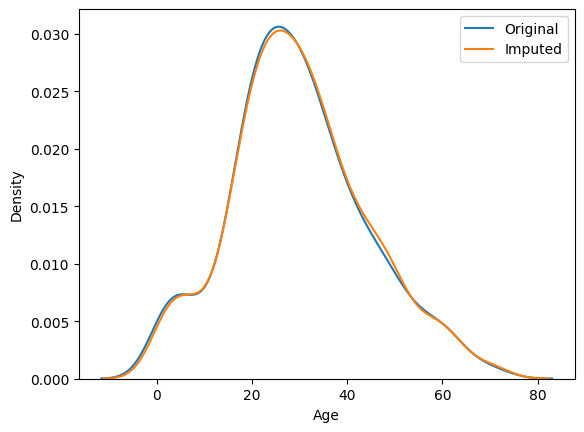

In [27]:
#  sns.displot(x_train['Age'],label ='Original',hist = False)
# sns.displot(x_train['Age_imputed'],label ='Imputed',hist = False)
sns.kdeplot(x_train['Age'], label ='Original')
sns.kdeplot(x_train['Age_imputed'], label ='Imputed')

plt.legend()
plt.show()

In [28]:
print("Original Varience", x_train['Age'].var())
print('Imputed Varience', x_train['Age_imputed'].var())

Original Varience 204.3495133904614
Imputed Varience 203.81086170905846


In [30]:
x_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,45.288881
Age,71.512440,204.349513,204.349513
Age_imputed,45.288881,204.349513,203.810862


<Axes: >

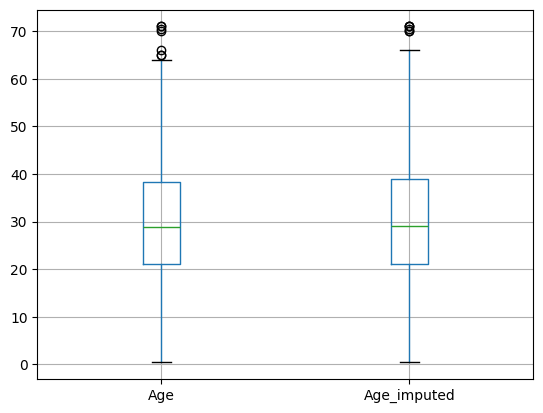

In [31]:
x_train[['Age','Age_imputed']].boxplot()

In [33]:
# sampled_value = x_train['Age'].dropna().sample(1,random_state = int(observation['Fare']))

Categorical Data

In [36]:
data =pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [37]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [38]:
data.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [40]:
x= data
y=data['SalePrice']

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [42]:
x_train['GarageQual_imputed'] = x_train['GarageQual']
x_test['GarageQual_imputed'] = x_test['GarageQual']

x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

In [43]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
654,TA,TA,350000,TA,TA
206,TA,TA,143900,TA,TA
1053,Gd,TA,144500,TA,Gd
236,NaN,TA,185500,TA,NaN
1144,NaN,TA,80000,TA,NaN


In [45]:
x_train.loc[x_train['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test.loc[x_test['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = x_train['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train.loc[x_train['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test.loc[x_test['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = x_train['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

In [46]:

temp = pd.concat(
        [
            x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),
            x_train['GarageQual_imputed'].value_counts() / len(x_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [47]:

temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.001712


In [48]:
temp = pd.concat(
        [
            x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
            x_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.656566
TA,0.412439,0.531987
Fa,0.040917,0.051627
Po,0.027823,0.038159
Ex,0.024550,0.032548


/tmp/ipython-input-953161725.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
/tmp/ipython-input-953161725.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] =

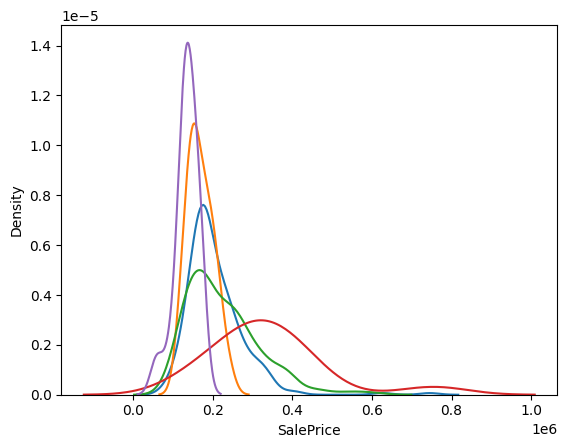

In [49]:

for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

/tmp/ipython-input-484091634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
/tmp/ipython-input-484091634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['Firepla

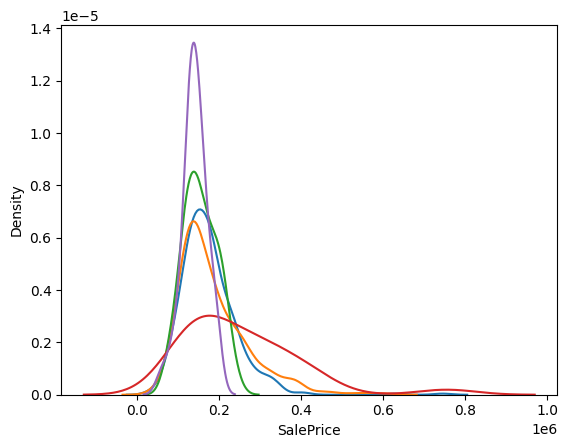

In [50]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()